In [1]:
# Plotting and math imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

import pandas as pd

from datetime import datetime
from typing import List, Optional, Dict, Tuple

from scipy import stats


## Load the ILI data and get column names

The spatially joined data we will load are created by joining `EC_LOF_Risk` table (spatialized onto pipeline segments) onto `cleaned_ILI_<year>` in ArcMap. In the import/export process, the resulting tables' column names are screwed up.

Here we load the originally `cleaned_ILI_<year>.csv` file that's imported into ArcMap and get the column names, so we can fix them later. This fix will allow us to use previous code written to filter out certain anomaly types.

In [2]:
dir_name = r"C:\Users\A1YU\OneDrive - PGE\Documents\code\ModelPerformance\processed_data"
cleaned_ILI_csv_name = "cleaned_ILI_2021.csv"
file_name = fr'{dir_name}\{cleaned_ILI_csv_name}'

In [3]:
# Read the file
file_name = fr'{dir_name}\{cleaned_ILI_csv_name}'
original_cleaned_ILI_data = pd.read_csv(file_name, low_memory=False)

# Output the number of rows
print("Total rows: {0}".format(len(original_cleaned_ILI_data)))
ILI_headers = list(original_cleaned_ILI_data.columns)

Total rows: 311799


In [4]:
# Delete to save memory
if original_cleaned_ILI_data is not None:
    del original_cleaned_ILI_data

In [5]:
ILI_headers = [s.strip() for s in ILI_headers]
ILI_headers

['Vendor',
 'Source',
 'Route',
 'Route_NoPrefix',
 'MP1',
 'MP2',
 'Year',
 'ILI Project Name',
 'ML Survey Date',
 'Alignment Comment',
 'Joint / US GW Number',
 'ILI Survey Distance (ft)',
 'Joint Length (ft)',
 'From U/S GW (ft)',
 'To D/S GW (ft)',
 'Identification',
 'Comment',
 'Tool Speed (mph)',
 'WT (in)',
 'SMYS (PSI)',
 'MAOP (PSI)',
 'OD (in)',
 'Longseam Visible',
 'Seam Pos.',
 'Depth (%)',
 'Depth* (with tool tolerances)',
 'OD Reduction (%)',
 'Length (in)',
 'Width (in)',
 "O'clock",
 'Internal',
 'Bend Radius (D)',
 'Bend Angle (degrees)',
 'Bend Direction',
 'POF Category',
 'Associated Tool Tolerance',
 'Anomaly ID',
 'Estimated Failure Pressure (Pf)',
 'Pf/MAOP',
 'Pf* (with tool tolerances)',
 'Pf*/MAOP',
 'TotalBend Strain',
 'Bend - Vert Strain Component',
 'Bend - Horiz Strain Component',
 'Internal Dent Strain',
 'External Dent Strain',
 'Easting',
 'Northing',
 'Latitude',
 'Longitude',
 'Elevation',
 'U/S Reference',
 'Dist. To U/S Ref [ft]',
 'D/S Referenc

## Load and clean the spatially-joined data saved in csv

In [6]:
ILI_ECLOF_Pipesegment_joined = r"C:\Users\A1YU\OneDrive - PGE\Documents\code\ModelPerformance\processed_data\SJ_target=ILI_join=EC_spatialized_to_Pipesegment_2021.csv"
master_dataset = pd.read_csv(ILI_ECLOF_Pipesegment_joined, low_memory=False)

In [7]:
master_dataset.columns.values

array(['OBJECTID', 'Join_Count', 'TARGET_FID', 'Vendor', 'Source',
       'Route', 'Route_NoPr', 'MP1', 'MP2', 'Year', 'ILI_Projec',
       'ML_Survey', 'Alignment', 'Joint___US', 'ILI_Survey', 'Joint_Leng',
       'From_U_S_G', 'To_D_S_GW', 'Identifica', 'Comment', 'Tool_Speed',
       'WT__in_', 'SMYS__PSI_', 'MAOP__PSI_', 'OD__in_', 'Longseam_V',
       'Seam_Pos_', 'Depth____', 'Depth___wi', 'OD_Reducti', 'Length__in',
       'Width__in_', 'O_clock', 'Internal', 'Bend_Radiu', 'Bend_Angle',
       'Bend_Direc', 'POF_Catego', 'Associated', 'Anomaly_ID',
       'Estimated', 'Pf_MAOP', 'Pf___with', 'Pf__MAOP', 'TotalBend',
       'Bend___Ver', 'Bend___Hor', 'Internal_D', 'External_D', 'Easting',
       'Northing', 'Latitude', 'Longitude', 'Elevation', 'U_S_Refere',
       'Dist__To_U', 'D_S_Refere', 'Dist__To_D', 'ILI_Vendor',
       'PG_E_Stati', 'OBJECTID_1', 'sortid', 'route_1', 'beginstati',
       'beginsta_1', 'endstation', 'endstati_1', 'Mainline_C',
       'Dry_Chlori', 'Third_

The field names gets screwed up/cut off during the spatial-join and writing to csv process (might need to do all this in ArcPy..). Let's rename them to actual names.

Everything from `'Vendor'` to `'PG_E_stati'` correspond to original ILI column names. So just replace those.

In [8]:
# Note for 2022's data, we start at `2`. I think the difference here is that for 2021 I used
# spatial-join geoprocessing tool instead of from the right click menu
master_dataset.columns.values[3: 3 + len(ILI_headers)] = ILI_headers

In [9]:
master_dataset.columns.values

array(['OBJECTID', 'Join_Count', 'TARGET_FID', 'Vendor', 'Source',
       'Route', 'Route_NoPrefix', 'MP1', 'MP2', 'Year',
       'ILI Project Name', 'ML Survey Date', 'Alignment Comment',
       'Joint / US GW Number', 'ILI Survey Distance (ft)',
       'Joint Length (ft)', 'From U/S GW (ft)', 'To D/S GW (ft)',
       'Identification', 'Comment', 'Tool Speed (mph)', 'WT (in)',
       'SMYS (PSI)', 'MAOP (PSI)', 'OD (in)', 'Longseam Visible',
       'Seam Pos.', 'Depth (%)', 'Depth* (with tool tolerances)',
       'OD Reduction (%)', 'Length (in)', 'Width (in)', "O'clock",
       'Internal', 'Bend Radius (D)', 'Bend Angle (degrees)',
       'Bend Direction', 'POF Category', 'Associated Tool Tolerance',
       'Anomaly ID', 'Estimated Failure Pressure (Pf)', 'Pf/MAOP',
       'Pf* (with tool tolerances)', 'Pf*/MAOP', 'TotalBend Strain',
       'Bend - Vert Strain Component', 'Bend - Horiz Strain Component',
       'Internal Dent Strain', 'External Dent Strain', 'Easting',
       'Northi

In [10]:
# These are the fields we also care about
FP_fields = ['Estimated Failure Pressure (Pf)', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP']

In [11]:
# Now correct the EC_LOF_Risk values
calculated_risk_fields =  ['EC_LOF_Leak', 'EC_LOF_Rupture']
master_dataset.rename(
    columns={
        "EC_LOF_Rup": "EC_LOF_Rupture",
        "EC_LOF_Lea": "EC_LOF_Leak",
    },
    inplace=True
)

In [12]:
# Also get the stationing number, so we are not simply comparing individual anomaly to pipe values
# Note that `beginstationseriesid` is unique, meaning that one route can have multiple different `beginstationseriesid`.
location_fields = ["route", "beginstationseriesid", "beginstationnum", "endstationseriesid", "endstationnum"]
master_dataset.rename(
    columns={
        "Route": "route",
        "beginstati": "beginstationseriesid",
        "beginsta_1": "beginstationnum",
        "endstation": "endstationseriesid",
        "endstati_1": "endstationnum",
    },
    inplace=True
)

In [13]:
# We als want to later compare the risk values to volumetric loss, so keep track of those fields as well
volumetric_loss_fields = ["Identification", "Depth (%)", "Internal", "WT (in)", "OD (in)", "Width (in)", "Length (in)"]

### ILI mileage sanity check

Using stationing calculation vs. ILI mileage marker calculations

Sanity check, total ILI mileage for 2021 according to Satvinder's [dashboard](https://pge.sharepoint.com/sites/TIMPRisk/SitePages/TIMP%20ILI%20Assessment.aspx?xsdata=MDV8MDF8fDI2Y2YwODcyZjQ3YTRkNDJlZTJmMDhkYmRiMTliZjA0fDQ0YWU2NjFhZWNlNjQxYWFiYzk2N2MyYzg1YTA4OTQxfDB8MHw2MzgzNDQ2NzU4Mjg0OTM4NzF8VW5rbm93bnxWR1ZoYlhOVFpXTjFjbWwwZVZObGNuWnBZMlY4ZXlKV0lqb2lNQzR3TGpBd01EQWlMQ0pRSWpvaVYybHVNeklpTENKQlRpSTZJazkwYUdWeUlpd2lWMVFpT2pFeGZRPT18MXxMMk5vWVhSekx6RTVPbU5qTlRnMU56YzVMVEpsT0dFdE5EUmhNeTA1WVRBMkxUSXdZVGRpTkRabU9UUmhNRjlsTkdSa05XVmxPUzAyWWpOakxUUTJZamN0WVdSaU5pMWtOV1ZqTWpsbVpEZGxOekpBZFc1eExtZGliQzV6Y0dGalpYTXZiV1Z6YzJGblpYTXZNVFk1T0RnM01EYzRNakk0TVE9PXwyNWZmZWM1NDI0NjQ0OWIxZWUyZjA4ZGJkYjE5YmYwNHw2NDgwOGMwYjdiM2E0YTJkYmU5ZWQ3YzFhZjNmMjM3OQ%3D%3D&sdata=blBhSWhrZ1JDaE1rY1MyZyswRDEweTZMaEllM3RvakNNRUJyNTdWM09lOD0%3D&ovuser=44ae661a-ece6-41aa-bc96-7c2c85a08941%2CA1YU%40pge.com&OR=Teams-HL&CT=1703124907343&clickparams=eyJBcHBOYW1lIjoiVGVhbXMtRGVza3RvcCIsIkFwcFZlcnNpb24iOiI0OS8yMzExMzAyODcxNCIsIkhhc0ZlZGVyYXRlZFVzZXIiOmZhbHNlfQ%3D%3D) is 950.04 miles

In [14]:
# Sanity check, total mileage
def sanity_check_ILI_mileage(df: pd.DataFrame) -> Tuple[pd.DataFrame, float]:
    # unique_segments = master_dataset[location_fields].drop_duplicates()
    unique_segments = df[["beginstationseriesid", "beginstationnum", "endstationnum", "endstationseriesid"]].drop_duplicates()
    assert (unique_segments["beginstationseriesid"] == unique_segments["endstationseriesid"]).all(), "begin and end station series id should be same"
    ILI_mileage = (unique_segments["endstationnum"] - unique_segments["beginstationnum"]).sum() / 5280
    print(f"Found {ILI_mileage:.3f} miles of ILI data")
    return unique_segments, ILI_mileage

In [15]:
unique_segments, ILI_mileage = sanity_check_ILI_mileage(master_dataset)

AssertionError: begin and end station series id should be same

In [16]:
master_dataset[master_dataset["beginstationseriesid"].isna()]["route"].unique()

array(['L-DREG4327', 'DFM-0837-01', 'DFM-1601-09', 'DFM-1611-03',
       'DFM-8805-03', 'L-002', 'L-021D', 'L-050A-1', 'L-057A', 'L-109',
       'L-118A', 'L-118F', 'L-132A', 'L-177A', 'L-210A', 'L-DREG4180',
       'L-X6511'], dtype=object)

In [17]:
# Sometimes we have rows with no stationing variables, this is when ILI and EC_LOF table don't overlap
# usually this is rows where the longitude/latitude in ILI data is invalid (i.e. all 0's)
null_stationing = master_dataset[location_fields].isnull()
if null_stationing.any().any():
    print(f"Rows with location fields with null values:\n----\n{null_stationing.sum()}")
    print(f"Droppiong these rows")

master_dataset_no_null_stationing = master_dataset.dropna(subset=location_fields)
unique_segments, ILI_mileage = sanity_check_ILI_mileage(master_dataset_no_null_stationing)

Rows with location fields with null values:
----
route                      0
beginstationseriesid    4582
beginstationnum         4582
endstationseriesid      4582
endstationnum           4582
dtype: int64
Droppiong these rows
Found 596.395 miles of ILI data


Calculating from stationing, the total mileage is much less than that calculated from mileage markers in ILI data.

In [18]:
# How about calculate total mileage from looking at max MP2 and min MP1 grouped by route?
unique_MP_pairs = master_dataset_no_null_stationing[["route", "MP1", "MP2"]].drop_duplicates()
unique_MP_pairs["diff_MP"] = unique_MP_pairs["MP2"] - unique_MP_pairs["MP1"]
print(f"ILI mileage calculated from MP markers = {unique_MP_pairs['diff_MP'].sum():.3f} miles")

ILI mileage calculated from MP markers = 865.433 miles


Why is this the case?

In [19]:
# Group by route and look at the data here
group_by_route = master_dataset_no_null_stationing.groupby(["route"])
for name, group in group_by_route:
    display(group[location_fields + ["MP1", "MP2", "Identification"]])

,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
693,DFM-0837-01,34207.0,7030.10,34207.0,7076.07,0.03,1.23,Other
804,DFM-0837-01,65745.0,51.70,65745.0,51.90,0.03,1.23,Other
914,DFM-0837-01,34207.0,5375.03,34207.0,5445.42,0.03,1.23,Other
1025,DFM-0837-01,34207.0,4301.10,34207.0,4471.25,0.03,1.23,Other
1112,DFM-0837-01,34207.0,3485.20,34207.0,3537.10,0.03,1.23,Other
1213,DFM-0837-01,34207.0,2629.69,34207.0,2748.75,0.03,1.23,Other
1341,DFM-0837-01,34207.0,1406.09,34207.0,1645.90,0.03,1.23,Other
1443,DFM-0837-01,34207.0,654.30,34207.0,1074.96,0.03,1.23,Other
1493,DFM-0837-01,34207.0,388.71,34207.0,550.77,0.03,1.23,Other


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
1753,DFM-1615-01,35670.0,62611.75,35670.0,62614.1,0.02,16.58,Girth Weld
1754,DFM-1615-01,35670.0,62611.75,35670.0,62614.1,0.02,16.58,Bend
1755,DFM-1615-01,35670.0,62611.75,35670.0,62614.1,0.02,16.58,Girth Weld
1756,DFM-1615-01,35670.0,62611.75,35670.0,62614.1,0.02,16.58,Girth Weld
1757,DFM-1615-01,35670.0,62611.75,35670.0,62614.1,0.02,16.58,Bend
...,...,...,...,...,...,...,...,...
5153,DFM-1615-01,32021.0,87689.72,32021.0,87709.1,0.02,16.58,Girth Weld
5154,DFM-1615-01,32021.0,87689.72,32021.0,87709.1,0.02,16.58,Support
5155,DFM-1615-01,32021.0,87689.72,32021.0,87709.1,0.02,16.58,Tap
5156,DFM-1615-01,32021.0,87689.72,32021.0,87709.1,0.02,16.58,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
30278,DFM-1615-04,35670.0,62611.75,35670.0,62614.1,0.01,16.17,Area Start Launcher
30279,DFM-1615-04,35670.0,62611.75,35670.0,62614.1,0.01,16.17,Support
30280,DFM-1615-04,35670.0,62611.75,35670.0,62614.1,0.01,16.17,Girth Weld
30281,DFM-1615-04,35670.0,62611.75,35670.0,62614.1,0.01,16.17,Bend
30282,DFM-1615-04,35670.0,62611.75,35670.0,62614.1,0.01,16.17,Girth Weld
...,...,...,...,...,...,...,...,...
33745,DFM-1615-04,32021.0,87689.72,32021.0,87709.1,0.01,16.17,Girth Weld
33746,DFM-1615-04,32021.0,87689.72,32021.0,87709.1,0.01,16.17,Tap
33747,DFM-1615-04,32021.0,87689.72,32021.0,87709.1,0.01,16.17,Support
33748,DFM-1615-04,32021.0,87689.72,32021.0,87709.1,0.01,16.17,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
5166,DFM-8805-03,65745.0,51.70,65745.0,51.90,0.01,0.52,Stopple
5167,DFM-8805-03,36389.0,36.10,36389.0,114.09,0.01,0.52,Girth Weld
5168,DFM-8805-03,36389.0,36.10,36389.0,114.09,0.01,0.52,Girth Weld
5169,DFM-8805-03,36389.0,36.10,36389.0,114.09,0.01,0.52,Bend
5170,DFM-8805-03,36389.0,36.10,36389.0,114.09,0.01,0.52,Girth Weld
...,...,...,...,...,...,...,...,...
5460,DFM-8805-03,36389.0,2817.33,36389.0,2833.70,0.01,0.52,
5461,DFM-8805-03,36389.0,2817.33,36389.0,2833.70,0.01,0.52,Close Metal Object
5462,DFM-8805-03,65745.0,51.70,65745.0,51.90,0.01,0.52,Girth Weld
5463,DFM-8805-03,27403.0,13.50,27403.0,15.50,0.01,0.52,Tap


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
5483,L-002,35882.0,648573.08,35882.0,648666.81,121.91,122.13,AGM
5520,L-002,35882.0,649341.88,35882.0,649390.37,121.91,122.13,AGM


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
5578,L-021D,65745.0,51.7,65745.0,51.9,18.74,31.81,Flange
5579,L-021D,65745.0,51.7,65745.0,51.9,18.74,31.81,Valve
5580,L-021D,65745.0,51.7,65745.0,51.9,18.74,31.81,Flange
5581,L-021D,65745.0,51.7,65745.0,51.9,18.74,31.81,Girth Weld
5582,L-021D,65745.0,51.7,65745.0,51.9,18.74,31.81,Tap
...,...,...,...,...,...,...,...,...
311794,L-021D,42470.0,2.7,42470.0,3.2,18.74,31.81,Girth Weld
311795,L-021D,42470.0,3.2,42470.0,5.9,18.74,31.81,Valve
311796,L-021D,42470.0,3.2,42470.0,5.9,18.74,31.81,Girth Weld
311797,L-021D,42470.0,3.2,42470.0,5.9,18.74,31.81,Tap


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
10287,L-021E,28748.0,28.9,28748.0,32.7,64.54,93.54,Girth Weld
10288,L-021E,28748.0,28.9,28748.0,32.7,64.54,93.54,Girth Weld
10289,L-021E,28748.0,28.9,28748.0,32.7,64.54,93.54,Support
10290,L-021E,65745.0,51.7,65745.0,51.9,64.54,93.54,Girth Weld
10291,L-021E,65745.0,51.7,65745.0,51.9,64.54,93.54,Bend
...,...,...,...,...,...,...,...,...
27106,L-021E,65745.0,51.7,65745.0,51.9,64.54,93.54,Bend
27107,L-021E,65745.0,51.7,65745.0,51.9,64.54,93.54,Girth Weld
27108,L-021E,25911.0,20.9,25911.0,22.6,64.54,93.54,Tap
27109,L-021E,65745.0,51.7,65745.0,51.9,64.54,93.54,Tap


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
33750,L-021G,34717.0,46406.41,34717.0,46613.08,8.6564,10.2998,Area Start Launcher
33751,L-021G,34717.0,46406.41,34717.0,46613.08,8.6564,10.2998,Girth Weld
33752,L-021G,34717.0,46406.41,34717.0,46613.08,8.6564,10.2998,Girth Weld
33753,L-021G,34717.0,46406.41,34717.0,46613.08,8.6564,10.2998,Flange
33754,L-021G,34717.0,46406.41,34717.0,46613.08,8.6564,10.2998,Girth Weld
...,...,...,...,...,...,...,...,...
34242,L-021G,65745.0,51.70,65745.0,51.90,8.6564,10.2998,Flange
34243,L-021G,65745.0,51.70,65745.0,51.90,8.6564,10.2998,Girth Weld
34244,L-021G,65745.0,51.70,65745.0,51.90,8.6564,10.2998,Girth Weld
34245,L-021G,34717.0,54752.04,34717.0,54843.87,8.6564,10.2998,Tap


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
27114,L-050A-1,36300.0,496.9,36300.0,518.6,1.54,1.55,Other
27142,L-050A-1,36300.0,496.9,36300.0,518.6,1.54,1.55,Other
27147,L-050A-1,36300.0,496.9,36300.0,518.6,1.54,1.55,Other
27198,L-050A-1,36300.0,496.9,36300.0,518.6,1.54,1.55,Other


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
27239,L-057A,50794.0,55544.6,50794.0,55625.95,10.51,10.6,AGM
27586,L-057A,65745.0,51.7,65745.0,51.90,10.51,10.6,AGM


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
34247,L-101,30649.0,0.00,30649.0,0.50,0.0,11.85,Area Start Launcher
34248,L-101,29730.0,2.40,29730.0,10.50,0.0,11.85,Girth Weld
34249,L-101,29730.0,2.40,29730.0,10.50,0.0,11.85,Flange
34250,L-101,29730.0,2.40,29730.0,10.50,0.0,11.85,Girth Weld
34251,L-101,38428.0,0.00,38428.0,0.30,0.0,11.85,Support
...,...,...,...,...,...,...,...,...
38254,L-101,34549.0,43.19,34549.0,43.20,0.0,11.85,Girth Weld
38255,L-101,34549.0,43.19,34549.0,43.20,0.0,11.85,Flange
38256,L-101,34549.0,43.19,34549.0,43.20,0.0,11.85,Girth Weld
38257,L-101,34549.0,43.19,34549.0,43.20,0.0,11.85,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
38259,L-108,65745.0,51.70,65745.0,51.9,0.03,11.70,Area Start Launcher
38260,L-108,65745.0,51.70,65745.0,51.9,0.03,11.70,Tap
38261,L-108,65745.0,51.70,65745.0,51.9,0.03,11.70,Tap
38262,L-108,65745.0,51.70,65745.0,51.9,0.03,11.70,Girth Weld
38263,L-108,65745.0,51.70,65745.0,51.9,0.03,11.70,Girth Weld
...,...,...,...,...,...,...,...,...
46571,L-108,29807.0,47.29,29807.0,47.3,11.70,37.07,Girth Weld
46572,L-108,29807.0,47.29,29807.0,47.3,11.70,37.07,Girth Weld
46573,L-108,29807.0,47.29,29807.0,47.3,11.70,37.07,Flange
46574,L-108,29807.0,47.29,29807.0,47.3,11.70,37.07,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
27605,L-109,37731.0,144380.65,37731.0,144391.23,25.77,25.97,AGM
27830,L-109,37731.0,144718.35,37731.0,144740.84,25.77,25.97,AGM
28339,L-109,37731.0,145426.03,37731.0,145680.42,25.77,25.97,AGM
28539,L-109,37731.0,146201.74,37731.0,146214.95,25.77,25.97,AGM


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
28569,L-118A,35581.0,70374.25,35581.0,70709.80,72.82,72.83,AGM
28630,L-118A,35581.0,70786.83,35581.0,70864.15,72.82,72.83,AGM
28774,L-118A,65745.0,51.70,65745.0,51.90,72.82,72.83,AGM


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
28795,L-118F,65745.0,51.70,65745.0,51.9,0.0,0.75,Elbow
28796,L-118F,65745.0,51.70,65745.0,51.9,0.0,0.75,Weld
28797,L-118F,65745.0,51.70,65745.0,51.9,0.0,0.75,Manufacturing Related
28798,L-118F,65745.0,51.70,65745.0,51.9,0.0,0.75,Weld
28799,L-118F,65745.0,51.70,65745.0,51.9,0.0,0.75,Manufacturing Related
...,...,...,...,...,...,...,...,...
29055,L-118F,33946.0,2459.95,33946.0,2505.5,0.0,0.75,Metal Loss
29056,L-118F,33946.0,2459.95,33946.0,2505.5,0.0,0.75,Tap
29057,L-118F,33946.0,2459.95,33946.0,2505.5,0.0,0.75,Stopple
29058,L-118F,33946.0,2459.95,33946.0,2505.5,0.0,0.75,Manufacturing Related


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
46576,L-131,23731.0,0.00,23731.0,0.2,50.7,57.51,Area Start Launcher
46577,L-131,65745.0,51.70,65745.0,51.9,50.7,57.51,Girth Weld
46578,L-131,65745.0,51.70,65745.0,51.9,50.7,57.51,Girth Weld
46579,L-131,23731.0,7.53,23731.0,11.5,50.7,57.51,Close Metal Object
46580,L-131,23731.0,7.53,23731.0,11.5,50.7,57.51,Tap
...,...,...,...,...,...,...,...,...
49083,L-131,30649.0,0.00,30649.0,0.5,50.7,57.51,Tap
49084,L-131,30649.0,0.00,30649.0,0.5,50.7,57.51,Girth Weld
49085,L-131,30649.0,0.00,30649.0,0.5,50.7,57.51,Flange
49086,L-131,30649.0,0.00,30649.0,0.5,50.7,57.51,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
50168,L-132,30649.0,0.00,30649.0,0.5,0.0,31.93,Area Start Launcher
50169,L-132,65745.0,51.70,65745.0,51.9,0.0,31.93,Girth Weld
50170,L-132,65745.0,51.70,65745.0,51.9,0.0,31.93,Flange
50171,L-132,65745.0,51.70,65745.0,51.9,0.0,31.93,Girth Weld
50172,L-132,65745.0,51.70,65745.0,51.9,0.0,31.93,Tap
...,...,...,...,...,...,...,...,...
70760,L-132,28207.0,29.50,28207.0,34.6,0.0,31.93,Girth Weld
70761,L-132,28207.0,34.60,28207.0,36.6,0.0,31.93,Support
70762,L-132,45130.0,2.90,45130.0,3.4,0.0,31.93,Tap
70763,L-132,65745.0,51.70,65745.0,51.9,0.0,31.93,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
49088,L-132A,46139.0,2.3,46139.0,3.99,0.0,1.49,Area Start Launcher
49089,L-132A,46139.0,17.7,46139.0,19.70,0.0,1.49,Girth Weld
49090,L-132A,46139.0,19.7,46139.0,30.70,0.0,1.49,Tap
49091,L-132A,46139.0,19.7,46139.0,30.70,0.0,1.49,Tap
49092,L-132A,46139.0,30.7,46139.0,31.69,0.0,1.49,Support
...,...,...,...,...,...,...,...,...
50163,L-132A,65745.0,51.7,65745.0,51.90,0.0,1.49,Support
50164,L-132A,65745.0,51.7,65745.0,51.90,0.0,1.49,Tap
50165,L-132A,65745.0,51.7,65745.0,51.90,0.0,1.49,Girth Weld
50166,L-132A,65745.0,51.7,65745.0,51.90,0.0,1.49,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
70765,L-153,65745.0,51.70,65745.0,51.90,0.01,17.63,Area Start Launcher
70766,L-153,42063.0,60.59,42063.0,60.60,0.01,17.63,Girth Weld
70767,L-153,42063.0,12.00,42063.0,52.00,0.01,17.63,Girth Weld
70768,L-153,42063.0,12.00,42063.0,52.00,0.01,17.63,Support
70769,L-153,42063.0,12.00,42063.0,52.00,0.01,17.63,Tap
...,...,...,...,...,...,...,...,...
76102,L-153,65745.0,51.70,65745.0,51.90,0.01,17.63,Girth Weld
76103,L-153,28749.0,54.42,28749.0,54.89,0.01,17.63,Girth Weld
76104,L-153,65745.0,51.70,65745.0,51.90,0.01,17.63,Girth Weld
76105,L-153,65745.0,51.70,65745.0,51.90,0.01,17.63,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
29280,L-177A,39190.0,84957.59,39190.0,85033.49,15.97,15.99,Other
29351,L-177A,65745.0,51.70,65745.0,51.90,15.97,15.99,Other
29547,L-177A,65745.0,51.70,65745.0,51.90,24.81,24.83,AGM
29832,L-177A,39190.0,48055.10,39190.0,48069.10,8.90,9.10,AGM
29875,L-177A,65745.0,51.70,65745.0,51.90,8.90,9.10,AGM
...,...,...,...,...,...,...,...,...
89924,L-177A,55575.0,34.60,55575.0,35.60,37.84,88.83,Girth Weld
89925,L-177A,55576.0,2.10,55576.0,9.60,37.84,88.83,Support
89926,L-177A,55576.0,2.10,55576.0,9.60,37.84,88.83,Tap
89927,L-177A,55576.0,2.10,55576.0,9.60,37.84,88.83,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
89929,L-191-1,58936.0,0.0,58936.0,0.2,20.46,25.29,Area Start Launcher
89930,L-191-1,58936.0,0.0,58936.0,0.2,20.46,25.29,Tap
89931,L-191-1,58936.0,0.0,58936.0,0.2,20.46,25.29,Tap
89932,L-191-1,58936.0,0.0,58936.0,0.2,20.46,25.29,Tap
89933,L-191-1,58936.0,0.0,58936.0,0.2,20.46,25.29,Tap
...,...,...,...,...,...,...,...,...
94122,L-191-1,65745.0,51.7,65745.0,51.9,20.46,25.29,Girth Weld
94123,L-191-1,65745.0,51.7,65745.0,51.9,20.46,25.29,Girth Weld
94124,L-191-1,65745.0,51.7,65745.0,51.9,20.46,25.29,Flange
94125,L-191-1,65745.0,51.7,65745.0,51.9,20.46,25.29,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
29892,L-210A,35615.0,140292.18,35615.0,140520.89,25.34,25.62,AGM
30047,L-210A,65745.0,51.70,65745.0,51.90,25.34,25.62,AGM


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
94127,L-210B,65745.0,51.70,65745.0,51.9,1.37,25.89,Area Start Launcher
94128,L-210B,65745.0,51.70,65745.0,51.9,1.37,25.89,Flange
94129,L-210B,65745.0,51.70,65745.0,51.9,1.37,25.89,Girth Weld
94130,L-210B,65745.0,51.70,65745.0,51.9,1.37,25.89,Support
94131,L-210B,65745.0,51.70,65745.0,51.9,1.37,25.89,Tap
...,...,...,...,...,...,...,...,...
102501,L-210B,33684.0,58.69,33684.0,58.7,1.37,25.89,Girth Weld
102502,L-210B,33684.0,58.69,33684.0,58.7,1.37,25.89,Girth Weld
102503,L-210B,33684.0,58.69,33684.0,58.7,1.37,25.89,Flange
102504,L-210B,33684.0,58.69,33684.0,58.7,1.37,25.89,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
102506,L-300A,36549.0,842630.10,36549.0,842708.3,159.33,203.02,Area Start Launcher
102507,L-300A,36549.0,842630.10,36549.0,842708.3,159.33,203.02,Girth Weld
102508,L-300A,36549.0,842630.10,36549.0,842708.3,159.33,203.02,Area Start Missing Data
102509,L-300A,36549.0,842630.10,36549.0,842708.3,159.33,203.02,Support
102510,L-300A,36549.0,842630.10,36549.0,842708.3,159.33,203.02,Area End Missing Data
...,...,...,...,...,...,...,...,...
216299,L-300A,30643.0,47.59,30643.0,47.6,450.85,502.23,Area Start Support
216300,L-300A,30643.0,47.59,30643.0,47.6,450.85,502.23,Area End Support
216301,L-300A,65745.0,51.70,65745.0,51.9,450.85,502.23,Tap
216302,L-300A,28353.0,39.79,28353.0,39.8,450.85,502.23,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
216304,L-300B,35967.0,852707.20,35967.0,852724.73,161.02,203.07,Area Start Launcher
216305,L-300B,35967.0,852732.27,35967.0,852773.90,161.02,203.07,Girth Weld
216306,L-300B,35967.0,852732.27,35967.0,852773.90,161.02,203.07,Girth Weld
216307,L-300B,35967.0,852732.27,35967.0,852773.90,161.02,203.07,Bend
216308,L-300B,35967.0,852732.27,35967.0,852773.90,161.02,203.07,Tap
...,...,...,...,...,...,...,...,...
225119,L-300B,22760.0,1085497.61,22760.0,1085530.61,161.02,203.07,Girth Weld
225120,L-300B,22760.0,1085497.61,22760.0,1085530.61,161.02,203.07,Tap
225121,L-300B,22760.0,1085497.61,22760.0,1085530.61,161.02,203.07,Support
225122,L-300B,22760.0,1085497.61,22760.0,1085530.61,161.02,203.07,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
225124,L-303,38226.0,141.9,38226.0,143.1,0.0,42.83,Area Start Launcher
225125,L-303,38226.0,141.9,38226.0,143.1,0.0,42.83,Girth Weld
225126,L-303,38226.0,141.9,38226.0,143.1,0.0,42.83,Close Metal Object
225127,L-303,38226.0,141.9,38226.0,143.1,0.0,42.83,Support
225128,L-303,38226.0,141.9,38226.0,143.1,0.0,42.83,Girth Weld
...,...,...,...,...,...,...,...,...
239953,L-303,42865.0,95.3,42865.0,99.8,0.0,42.83,Girth Weld
239954,L-303,65745.0,51.7,65745.0,51.9,0.0,42.83,Support
239955,L-303,65745.0,51.7,65745.0,51.9,0.0,42.83,Tap
239956,L-303,65745.0,51.7,65745.0,51.9,0.0,42.83,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
239958,L-400,35666.0,238.10,35666.0,260.8,0.00,82.38,Area Start Launcher
239959,L-400,35666.0,278.15,35666.0,282.2,0.00,82.38,Girth Weld
239960,L-400,35666.0,278.15,35666.0,282.2,0.00,82.38,Area Start Support
239961,L-400,35666.0,282.20,35666.0,296.8,0.00,82.38,Area End Support
239962,L-400,35666.0,282.20,35666.0,296.8,0.00,82.38,Magnet
...,...,...,...,...,...,...,...,...
277609,L-400,65745.0,51.70,65745.0,51.9,82.38,142.58,Girth Weld
277610,L-400,65745.0,51.70,65745.0,51.9,82.38,142.58,Girth Weld
277611,L-400,27877.0,81.30,27877.0,82.3,82.38,142.58,Tap
277612,L-400,27877.0,81.30,27877.0,82.3,82.38,142.58,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
277614,L-401,39126.0,1235866.7,39126.0,1235874.38,233.89,317.91,Area Start Launcher
277615,L-401,39126.0,1235876.3,39126.0,1235916.00,233.89,317.91,Girth Weld
277616,L-401,39126.0,1235876.3,39126.0,1235916.00,233.89,317.91,Field Bend
277617,L-401,39126.0,1235876.3,39126.0,1235916.00,233.89,317.91,Tap
277618,L-401,39126.0,1235876.3,39126.0,1235916.00,233.89,317.91,Girth Weld
...,...,...,...,...,...,...,...,...
295139,L-401,59366.0,27.8,59366.0,28.30,233.89,317.91,Bend
295140,L-401,65745.0,51.7,65745.0,51.90,233.89,317.91,Girth Weld
295141,L-401,59366.0,18.5,59366.0,21.50,233.89,317.91,Tap
295142,L-401,59366.0,13.4,59366.0,14.80,233.89,317.91,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
0,L-DREG4180,25808.0,115.60,25808.0,146.00,0.022,0.04,Girth Weld
1,L-DREG4180,25808.0,115.60,25808.0,146.00,0.022,0.04,Flange
2,L-DREG4180,25808.0,115.60,25808.0,146.00,0.022,0.04,Tap
3,L-DREG4180,25808.0,115.60,25808.0,146.00,0.022,0.04,Magnet
4,L-DREG4180,25808.0,115.60,25808.0,146.00,0.022,0.04,Girth Weld
...,...,...,...,...,...,...,...,...
160,L-DREG4180,25808.0,3374.32,25808.0,3419.85,0.640,0.75,ML*
161,L-DREG4180,25808.0,3374.32,25808.0,3419.85,0.640,0.75,ML*
162,L-DREG4180,25808.0,3374.32,25808.0,3419.85,0.640,0.75,ML*
163,L-DREG4180,25808.0,3374.32,25808.0,3419.85,0.640,0.75,Other


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
295144,L-SP3,60196.0,10.00,60196.0,65.00,167.32,176.10,Area Start Launcher
295145,L-SP3,13424.0,41.70,13424.0,45.30,167.32,176.10,Girth Weld
295146,L-SP3,65745.0,51.70,65745.0,51.90,167.32,176.10,Girth Weld
295147,L-SP3,13424.0,36.60,13424.0,37.89,167.32,176.10,Support
295148,L-SP3,13424.0,36.60,13424.0,37.89,167.32,176.10,Magnet
...,...,...,...,...,...,...,...,...
307084,L-SP3,27349.0,36.89,27349.0,36.90,176.25,198.49,Girth Weld
307085,L-SP3,27349.0,36.89,27349.0,36.90,176.25,198.49,Flange
307086,L-SP3,27349.0,36.89,27349.0,36.90,176.25,198.49,Girth Weld
307087,L-SP3,27349.0,36.89,27349.0,36.90,176.25,198.49,Girth Weld


,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,MP1,MP2,Identification
30170,L-X6511,37557.0,491.0,37557.0,552.2,0.218,0.32,AGM
30259,L-X6511,37731.0,584.6,37731.0,631.4,0.218,0.32,AGM


Looks like the (MP1, MP2) distances (units=mile) are a lot bigger than that indicated in the corresponding `stationnum` (unit in ft). What does this mean? Current explanation:

- During ILI, the inspection does different segments of a route. Each continuous segment of route inspected is identified by the MP1 and MP2 values on that route.
- Each anomaly entry in ILI happens within one of these continuous segments.
- EC Risk table uses stationing to identify segments of pipes, these can be of finer resolution compared to the continuously inspected segments.

So when the distance calculated from the stationing variables assigned to each anomaly is LESS than that calculated from the ILI MP1/MP2 values, that means there are significant chunks of inspected pipes where there are no anomaly found.

## Filter out non-EC related fields

In [20]:
# Get the data frame with just these fields
relevant_fields = FP_fields + calculated_risk_fields + location_fields + volumetric_loss_fields
performance_df = master_dataset_no_null_stationing[relevant_fields]

In [21]:
performance_df.head()

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
0,0.0,0.0,0.0,0.0,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Girth Weld,0.0,,0.237,4.0,0.0,0.0
1,0.0,0.0,0.0,0.0,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Flange,0.0,,0.237,4.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Tap,0.0,,0.237,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Magnet,0.0,,0.237,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Girth Weld,0.0,,0.237,4.0,0.0,0.0


I think when all the failure pressure values are NULL, they get imported into ArcMAP as 0. So need to change them to `NaN`.

The risk values can actually be 0, judging by the mariner DB output.

In [33]:
master_dataset_no_null_stationing[FP_fields] = master_dataset_no_null_stationing[FP_fields].replace(0, np.nan)
performance_df = master_dataset_no_null_stationing[relevant_fields]

C:\Users\A1YU\AppData\Local\Temp\1\ipykernel_71504\2227147304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset_no_null_stationing[FP_fields] = master_dataset_no_null_stationing[FP_fields].replace(0, np.nan)


In [35]:
performance_df.head()

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
0,NaN,NaN,NaN,NaN,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Girth Weld,0.0,,0.237,4.0,0.0,0.0
1,NaN,NaN,NaN,NaN,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Flange,0.0,,0.237,4.0,0.0,0.0
2,NaN,NaN,NaN,NaN,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Tap,0.0,,0.237,4.0,0.0,0.0
3,NaN,NaN,NaN,NaN,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Magnet,0.0,,0.237,4.0,0.0,0.0
4,NaN,NaN,NaN,NaN,3.041551e-07,0.0,L-DREG4180,25808.0,115.6,25808.0,146.0,Girth Weld,0.0,,0.237,4.0,0.0,0.0


Failure pressure-related fields are NaN when it's something like "Girth Weld" or "Bend". These "anomalies" are not related to external corrosion. So we can filter these out and keep only anomaly rows that have legitimate signs of external corrosion.

In [36]:
from EC_corrosion_stats import (
    filter_identifications,
    filter_manufacturing_anomalies,
    get_external_anomaly_row_mask,
)
unique_identifications, filtered_performance_df = filter_identifications(performance_df)
filtered_performance_df = filter_manufacturing_anomalies(filtered_performance_df)
has_EC_row_mask = get_external_anomaly_row_mask(filtered_performance_df)


6.452% of all identifications has only 1 occurence
Total 26674 manufacturing Identifications
Total 307214 Identifications
 8.683% of identifications are manufacturing related
Total 280540 non-manufacturing identifications


C:\Users\A1YU\OneDrive - PGE\Documents\code\ModelPerformance\EC_corrosion_stats.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ILI_df["Identification"] = filtered_ILI_df["Identification"].astype(str).apply(lambda x: x.strip()).apply(lambda x: x.lower())


In [37]:
filtered_performance_df = filtered_performance_df.loc[has_EC_row_mask]

In [38]:
filtered_performance_df

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
30397,2428.84,3.37,2421.81,3.36,4.389604e-07,0.0,DFM-1615-04,32021.0,1927.54,32021.0,4310.57,metal loss corrosion,17.0,external,0.375,16.0,0.95,0.59
30433,2431.56,3.38,2427.64,3.37,4.389604e-07,0.0,DFM-1615-04,32021.0,4988.20,32021.0,5848.20,metal loss corrosion,23.0,external,0.375,16.0,1.08,0.40
30434,2429.30,3.37,2423.93,3.37,4.389604e-07,0.0,DFM-1615-04,32021.0,4988.20,32021.0,5848.20,cluster,23.0,external,0.375,16.0,2.78,0.49
30435,2430.32,3.38,2425.46,3.37,4.389604e-07,0.0,DFM-1615-04,32021.0,4988.20,32021.0,5848.20,metal loss corrosion,22.0,external,0.375,16.0,0.91,0.46
30436,2432.89,3.38,2428.58,3.37,4.389604e-07,0.0,DFM-1615-04,32021.0,4988.20,32021.0,5848.20,cluster,15.0,external,0.375,16.0,2.77,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307004,1446.22,3.81,1443.14,3.80,3.369207e-07,0.0,L-SP3,53525.0,175377.13,53525.0,175514.29,metal loss corrosion,31.0,external,0.281,24.0,0.59,0.44
307009,1450.12,3.82,1447.90,3.81,3.369207e-07,0.0,L-SP3,53525.0,175514.29,53525.0,175562.99,metal loss corrosion,10.0,external,0.281,24.0,1.50,0.49
307010,1447.25,3.81,1442.91,3.80,3.369207e-07,0.0,L-SP3,53525.0,175514.29,53525.0,175562.99,metal loss corrosion,14.0,external,0.281,24.0,0.59,0.66
307012,1450.53,3.82,1449.44,3.81,3.369207e-07,0.0,L-SP3,53525.0,175514.29,53525.0,175562.99,metal loss corrosion,17.0,external,0.281,24.0,0.83,0.32


In [39]:
filtered_performance_df[filtered_performance_df["Pf/MAOP"].isnull()]

,Estimated Failure Pressure (Pf),Pf/MAOP,Pf* (with tool tolerances),Pf*/MAOP,EC_LOF_Leak,EC_LOF_Rupture,route,beginstationseriesid,beginstationnum,endstationseriesid,endstationnum,Identification,Depth (%),Internal,WT (in),OD (in),Width (in),Length (in)
47823,NaN,NaN,NaN,NaN,0.000001,0.0,L-131,57354.0,2.50,57354.0,2.7,extra metal,0.0,external,0.438,30.0,0.00,0.00
48072,NaN,NaN,NaN,NaN,0.000002,0.0,L-131,13585.0,0.00,13585.0,1.0,extra metal,0.0,external,0.375,30.0,0.00,0.00
48182,NaN,NaN,NaN,NaN,0.000001,0.0,L-131,65745.0,51.70,65745.0,51.9,extra metal,0.0,external,0.375,30.0,0.00,0.00
48352,NaN,NaN,NaN,NaN,0.000002,0.0,L-131,32774.0,263.27,32774.0,273.0,extra metal,0.0,external,0.375,30.0,0.00,0.00
48849,NaN,NaN,NaN,NaN,0.000001,0.0,L-131,6855.0,67.60,6855.0,67.9,gouge,10.0,external,0.325,30.0,0.95,0.62
48852,NaN,NaN,NaN,NaN,0.000001,0.0,L-131,6855.0,67.60,6855.0,67.9,gouge,10.0,external,0.325,30.0,0.63,0.82
91992,NaN,NaN,NaN,NaN,0.000001,0.0,L-191-1,65745.0,51.70,65745.0,51.9,gouge,15.0,external,0.281,16.0,0.59,0.49
91997,NaN,NaN,NaN,NaN,0.000001,0.0,L-191-1,65745.0,51.70,65745.0,51.9,gouge,20.0,external,0.281,16.0,0.59,0.43
91998,NaN,NaN,NaN,NaN,0.000001,0.0,L-191-1,65745.0,51.70,65745.0,51.9,gouge,22.0,external,0.281,16.0,0.59,0.34
92002,NaN,NaN,NaN,NaN,0.000001,0.0,L-191-1,65745.0,51.70,65745.0,51.9,gouge,22.0,external,0.281,16.0,0.59,0.49


There are still some NaN entries, but the `Identification` values indicate they can be ignored as they are not really external metal corrosion entries, so we can safely drop them.

In [40]:
for field in FP_fields:
    filtered_performance_df = filtered_performance_df[
        filtered_performance_df[field].notna()
    ]
    
for field in FP_fields:
    print(filtered_performance_df[filtered_performance_df[field].isnull()])

Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool tolerances), Pf*/MAOP, EC_LOF_Leak, EC_LOF_Rupture, route, beginstationseriesid, beginstationnum, endstationseriesid, endstationnum, Identification, Depth (%), Internal, WT (in), OD (in), Width (in), Length (in)]
Index: []
Empty DataFrame
Columns: [Estimated Failure Pressure (Pf), Pf/MAOP, Pf* (with tool

Now nothing is NAN, we only have legitimate anomalies!

Text(0.5, 0.98, 'Failure pressure vs. Leak LOF')

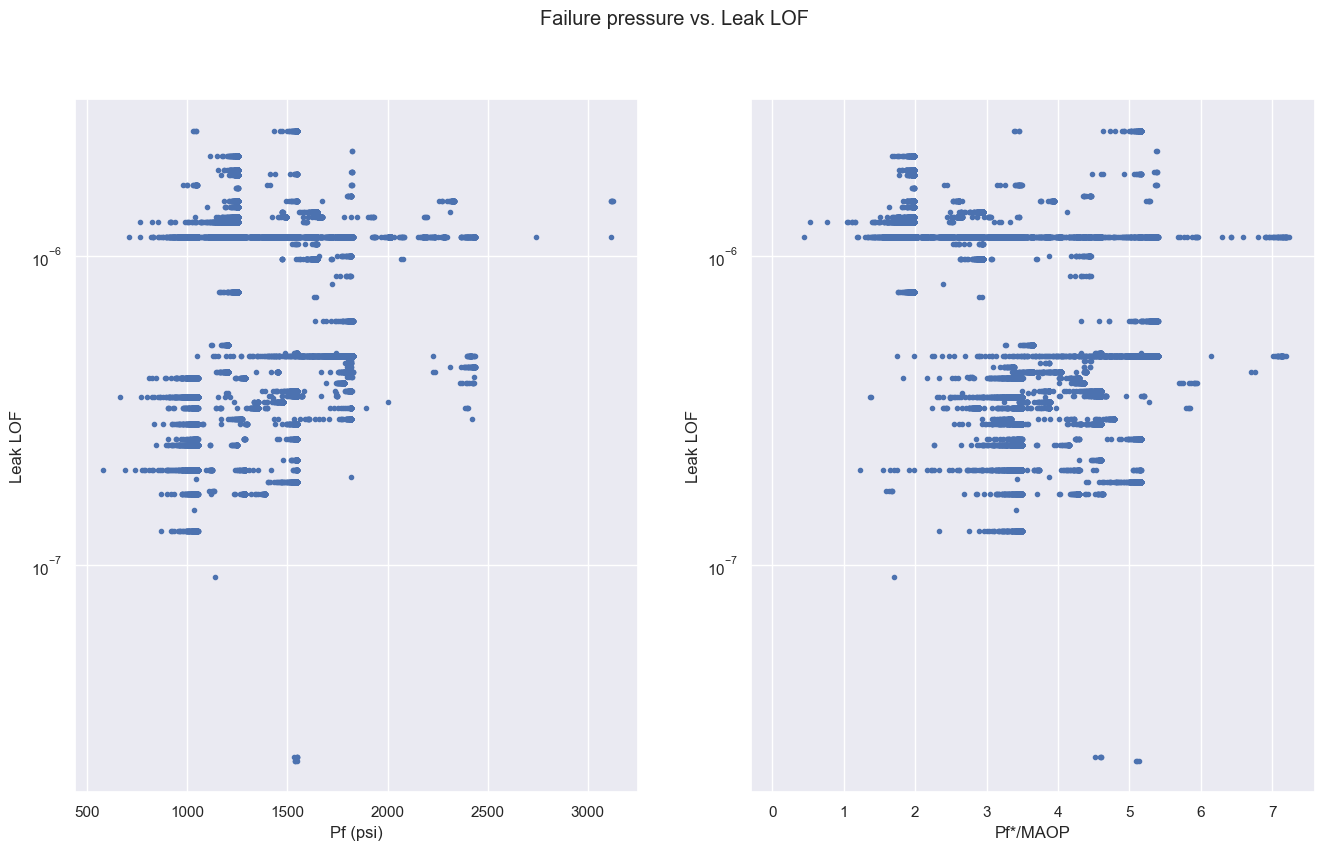

In [41]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(
    filtered_performance_df["Estimated Failure Pressure (Pf)"],
    filtered_performance_df["EC_LOF_Leak"],
    "."
)
plt.xlabel("Pf (psi)")
plt.ylabel("Leak LOF")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.plot(
    filtered_performance_df["Pf*/MAOP"],
    filtered_performance_df["EC_LOF_Leak"],
    "."
)
plt.xlabel("Pf*/MAOP")
plt.ylabel("Leak LOF")
plt.yscale("log")
plt.suptitle("Failure pressure vs. Leak LOF")

Text(0.5, 0.98, 'Failure pressure vs. Rupture LOF')

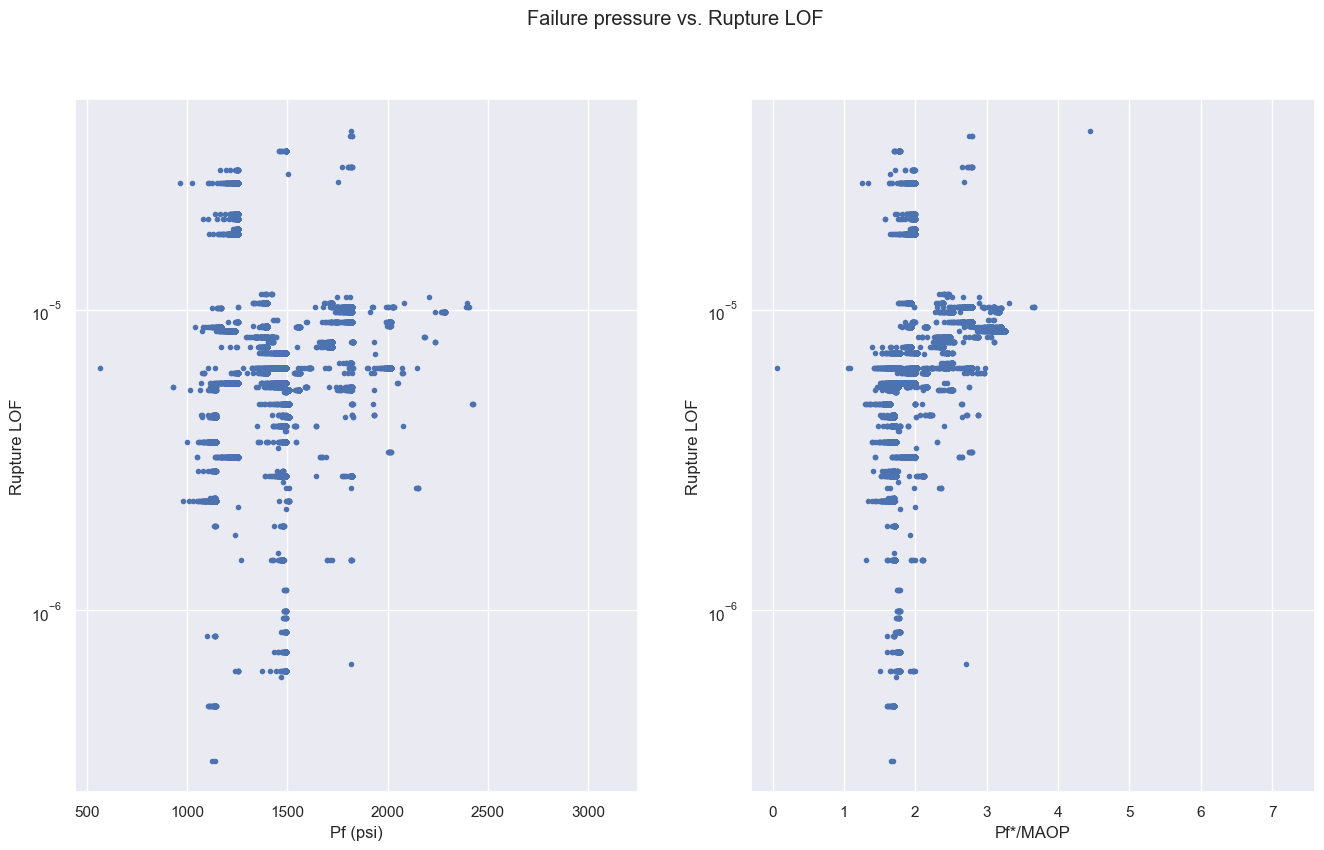

In [42]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(
    filtered_performance_df["Estimated Failure Pressure (Pf)"],
    filtered_performance_df["EC_LOF_Rupture"],
    "."
)
plt.xlabel("Pf (psi)")
plt.ylabel("Rupture LOF")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.plot(
    filtered_performance_df["Pf*/MAOP"],
    filtered_performance_df["EC_LOF_Rupture"],
    "."
)
plt.xlabel("Pf*/MAOP")
plt.ylabel("Rupture LOF")
plt.yscale("log")
plt.suptitle("Failure pressure vs. Rupture LOF")

## Aggregate anomalies' Pf per dynamic segment

Jackson says:

> In the EC_LOF table, each segments is defined by it's beginstationseriesid, it's beginstationnum and it's endstationnum so I'd aggregate on those three attributes

In [43]:
# How many different `beginstationseriesid` are there?
num_unique_beginstationseriesid = len(np.unique(filtered_performance_df["beginstationseriesid"]))
num_unique_endstationseriesid = len(np.unique(filtered_performance_df["endstationseriesid"]))
assert num_unique_beginstationseriesid == num_unique_endstationseriesid,\
"We expect number of unique beginstationseriesid equal to that of endstationseriesid"

print(f"number of unique beginstationseriesid={num_unique_beginstationseriesid}, unique endstationseriesid={num_unique_endstationseriesid}")

# Are begin and end stationseries id the same?
same_begin_and_end_stationseriesid = np.all(filtered_performance_df["beginstationseriesid"] == filtered_performance_df["endstationseriesid"])
print(f"begin and end stationseriesid are {'the same' if same_begin_and_end_stationseriesid else 'not the same'}")

number of unique beginstationseriesid=111, unique endstationseriesid=111
begin and end stationseriesid are the same


Yes, so using `beginstationseriesid` should be enough.

In [44]:
stationing_vars = ["beginstationseriesid", "beginstationnum", "endstationnum"]
unique_segments = filtered_performance_df[stationing_vars].drop_duplicates()

In [45]:
display(unique_segments)
print(f"ILI data is mapped to {len(unique_segments)} unique risk-model dynamic pipe segments")

,beginstationseriesid,beginstationnum,endstationnum
30397,32021.0,1927.54,4310.57
30433,32021.0,4988.20,5848.20
30460,65745.0,51.70,51.90
30501,33387.0,6892.08,6954.31
30560,32021.0,7069.60,9138.60
...,...,...,...
306994,53525.0,174970.70,175112.02
307002,53525.0,175118.01,175359.59
307004,53525.0,175377.13,175514.29
307009,53525.0,175514.29,175562.99


ILI data is mapped to 4791 unique risk-model dynamic pipe segments


In [46]:
# How many unique per-segment risk values are there?
print(f"Number of unique EC_LOF_Leak values: {len(np.unique(filtered_performance_df['EC_LOF_Leak']))}")
print(f"Number of unique EC_LOF_Rupture values: {len(np.unique(filtered_performance_df['EC_LOF_Rupture']))}")

Number of unique EC_LOF_Leak values: 60
Number of unique EC_LOF_Rupture values: 74


So this means multiple pipe segments can still have the same risk values, meaning the pipe-risk mapping is many-to-1.

But double check if the risk values for anomalies for each segment is the same -- they should be

In [47]:
num_dynamic_segments_with_multiple_LOF_leak = np.sum(filtered_performance_df.groupby(stationing_vars)["EC_LOF_Leak"].nunique() != 1)
num_dynamic_segments_with_multiple_LOF_rupture = np.sum(filtered_performance_df.groupby(stationing_vars)["EC_LOF_Rupture"].nunique() != 1)
print(
    f"Number of dynamic segments with multiple LOF leak={num_dynamic_segments_with_multiple_LOF_leak}, "
    f"with multiple LOF rupture={num_dynamic_segments_with_multiple_LOF_rupture}"
)
assert (num_dynamic_segments_with_multiple_LOF_leak == 0) and (num_dynamic_segments_with_multiple_LOF_rupture == 0),\
"Risk values for anomalies mapped to the same dynamic segment should be the same!"

Number of dynamic segments with multiple LOF leak=0, with multiple LOF rupture=0


Both of them are 0 -- so anomalies within the same dynamic segment are indeed asigned the same risk value, as they should!

--------

### Diagnostic code

In case they are not, diagnostic code below

In [31]:
%%script false --no-raise-error


result = filtered_df.groupby(stationing_vars)["EC_LOF_Leak"].nunique()
groups_with_varying_LOF_Leak = result[result != 1]

NameError: name 'filtered_df' is not defined

In [ ]:
%%script false --no-raise-error

np.sum(result != 1)

In [ ]:
%%script false --no-raise-error

len(groups_with_varying_LOF_Leak) / len(result)

In [ ]:
%%script false --no-raise-error

np.unique(groups_with_varying_LOF_Leak, return_counts=True)

In [ ]:
%%script false --no-raise-error

FP_fields

In [ ]:
%%script false --no-raise-error

stationing_vars

In [ ]:
%%script false --no-raise-error

filtered_df.columns

In [ ]:
%%script false --no-raise-error

from scipy import stats

diff_to_mode_perc = []

for (i, group) in enumerate(groups_with_varying_LOF_Leak.index):
    # if i > 2:
        # break?
    print(f"Group: {group}")
    group_rows = filtered_df[
        (filtered_df["beginstationseriesid"] == group[0])
        & (filtered_df["beginstationnum"] == group[1])
        & (filtered_df["endstationnum"] == group[2])
    ][["EC_LOF_Leak", "EC_LOF_Rupture"]] 
    print(group_rows)
    # What's the max diff?
    # max_diff = np.max(group_rows) - np.min(group_rows)
    # what percentage of the most common value?
    # mode_val = stats.mode(group_rows).mode
    # diff_to_mode_perc.append(max_diff / mode_val)
    # print(group_rows)
    # print(f"Max diff is {max_diff / mode_val * 100 :.3f}% of mode value")
    print("\n")

In [ ]:
%%script false --no-raise-error

np.unique(diff_to_mode_perc, return_counts=True)

~~Are the difference in EC_LOF_Leak big enough to be significant? Why would a single pipe segment have different pipeline risk values?~~

~~This doesn't seem to make sense...each unique combination of `(beginstationseriesid, beginstationnum, endstationnum)` are supposed to represent a unique pipe segment, with a single EC_LOF value calculated.~~

~~But I'm seeing pipe "segments" aggregated this way can have up to 10 different risk values associated with them. Can this be accounted for spatial join errors? i.e. in a junction of pipe segments, multiple anomalies for different pipes get joined into the same?~~

~~Figure this out later...ask Gordon/Jackson. For now, just take the first value of these risk values...~~

----

----

### Plot figure with aggregation

Now we aggregate failure pressure from anomalies on pipe segments:
1. Mean
2. Min (less failure pressure = higher risk): makes sense for failure pressure

In [60]:
aggregation = {field: "mean" for field in FP_fields}
aggregation.update({field: "first" for field in calculated_risk_fields})
filtered_performance_df_grouped_by_mean = filtered_performance_df.groupby(stationing_vars).agg(aggregation).reset_index()

aggregation = {field: "min" for field in FP_fields}
aggregation.update({field: "first" for field in calculated_risk_fields})
filtered_performance_df_grouped_by_min = filtered_performance_df.groupby(stationing_vars).agg(aggregation).reset_index()

#### Initial plots with no regression lines

Not the final results.

Note the results seem to look better when the LOF is in linear rather than log-scale...

In [ ]:
# Leak LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
y_field = "EC_LOF_Leak"
y_label = "Leak LOF"

plt.figure(figsize=(16, 10))

# Top row = mean aggregation 
plt.subplot(2, 2, 1)
plt.plot(
    filtered_performance_df_grouped_by_mean["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 2)
plt.plot(
    filtered_performance_df_grouped_by_mean["Pf*/MAOP"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
# plt.suptitle("Failure pressure vs. Leak LOF, aggregate by pipe segment")

# Bot row = min aggregation
plt.subplot(2, 2, 3)
plt.plot(
    filtered_performance_df_grouped_by_min["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 4)
plt.plot(
    filtered_performance_df_grouped_by_min["Pf*/MAOP"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

In [ ]:
# Leak LOF:
y_field = "EC_LOF_Rupture"
y_label = "Rupture LOF"

plt.figure(figsize=(16, 10))

# Top row = mean aggregation 
plt.subplot(2, 2, 1)
plt.plot(
    filtered_performance_df_grouped_by_mean["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 2)
plt.plot(
    filtered_performance_df_grouped_by_mean["Pf*/MAOP"],
    filtered_performance_df_grouped_by_mean[y_field],
    "."
)
plt.xlabel("Mean segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
# plt.suptitle("Failure pressure vs. Leak LOF, aggregate by pipe segment")

# Bot row = min aggregation
plt.subplot(2, 2, 3)
plt.plot(
    filtered_performance_df_grouped_by_min["Estimated Failure Pressure (Pf)"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf (psi)")
plt.ylabel(y_label)
# plt.yscale("log")

plt.subplot(2, 2, 4)
plt.plot(
    filtered_performance_df_grouped_by_min["Pf*/MAOP"],
    filtered_performance_df_grouped_by_min[y_field],
    "."
)
plt.xlabel("Min segment Pf*/MAOP")
plt.ylabel(y_label)
# plt.yscale("log")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

#### Make plots with regression lines

In [66]:
import matplotlib
def make_logscale_scatter_with_reg_line(
    df: pd.DataFrame,
    x_field: str,
    x_label: str,
    y_field: str,
    y_label: str,
    ax: matplotlib.axes._axes.Axes,
    robust: bool = False,
) -> None:
    """
    `df` contains the data to be plotted, which can be selected by
    `x_field` and `y_field`.

    An dditional column will be created called `log_<y_field>` and
    added to the data frame in place. The (x,y) scatter plot will be drawn
    as is, but with the y-axis set to log-scale. A regression line will be
    fitted with the form `log(Y) ~ X` and super imposed onto the scatter
    plot. In the end, the new field will be removed to prevent future errors.

    `ax` will contain the Axes object where the plot will be drawn.

    `robust` option will be passed to `sns.regplot`, if True, it will de-weight
    outliers.
    """
    # add a small constant to `y_field` so taking the log won't give errors
    # make sure small constant is much smaller than the smallest `y_field` value
    min_nonzero_y = df.loc[df[y_field] > 0, y_field].min()
    eps = min(min_nonzero_y * 1e-3, 1e-10)
    log_y_field = f"log_{y_field}"
    df[log_y_field] = np.log10(df[y_field] + eps)
    
    sns.regplot(
        x=x_field, y=log_y_field, data=df,
        line_kws={'color': 'red'},
        logx=False, 
        ax=ax,
        robust=robust,
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"log({y_label})")
    df.drop(log_y_field, axis=1, inplace=True)

def make_linear_scale_scatter_with_reg_line(
    df: pd.DataFrame,
    x_field: str,
    x_label: str,
    y_field: str,
    y_label: str,
    ax: matplotlib.axes._axes.Axes,
    robust: bool = False,
) -> None:
    """
    `df` contains the data to be plotted, which can be selected by
    `x_field` and `y_field`.

    The (x,y) scatter plot will be drawn as is.
    A regression line will be fitted with the form `Y ~ X` and super 
    imposed onto the scatter plot.
    In the end, the new field will be removed to prevent future errors.

    `ax` will contain the Axes object where the plot will be drawn.
    """       
    sns.regplot(
        x=x_field, y=y_field, data=df,
        line_kws={'color': 'red'},
        logx=False, 
        ax=ax,
        robust=robust,
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Text(0.5, 0.98, 'Failure pressure vs. Leak LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

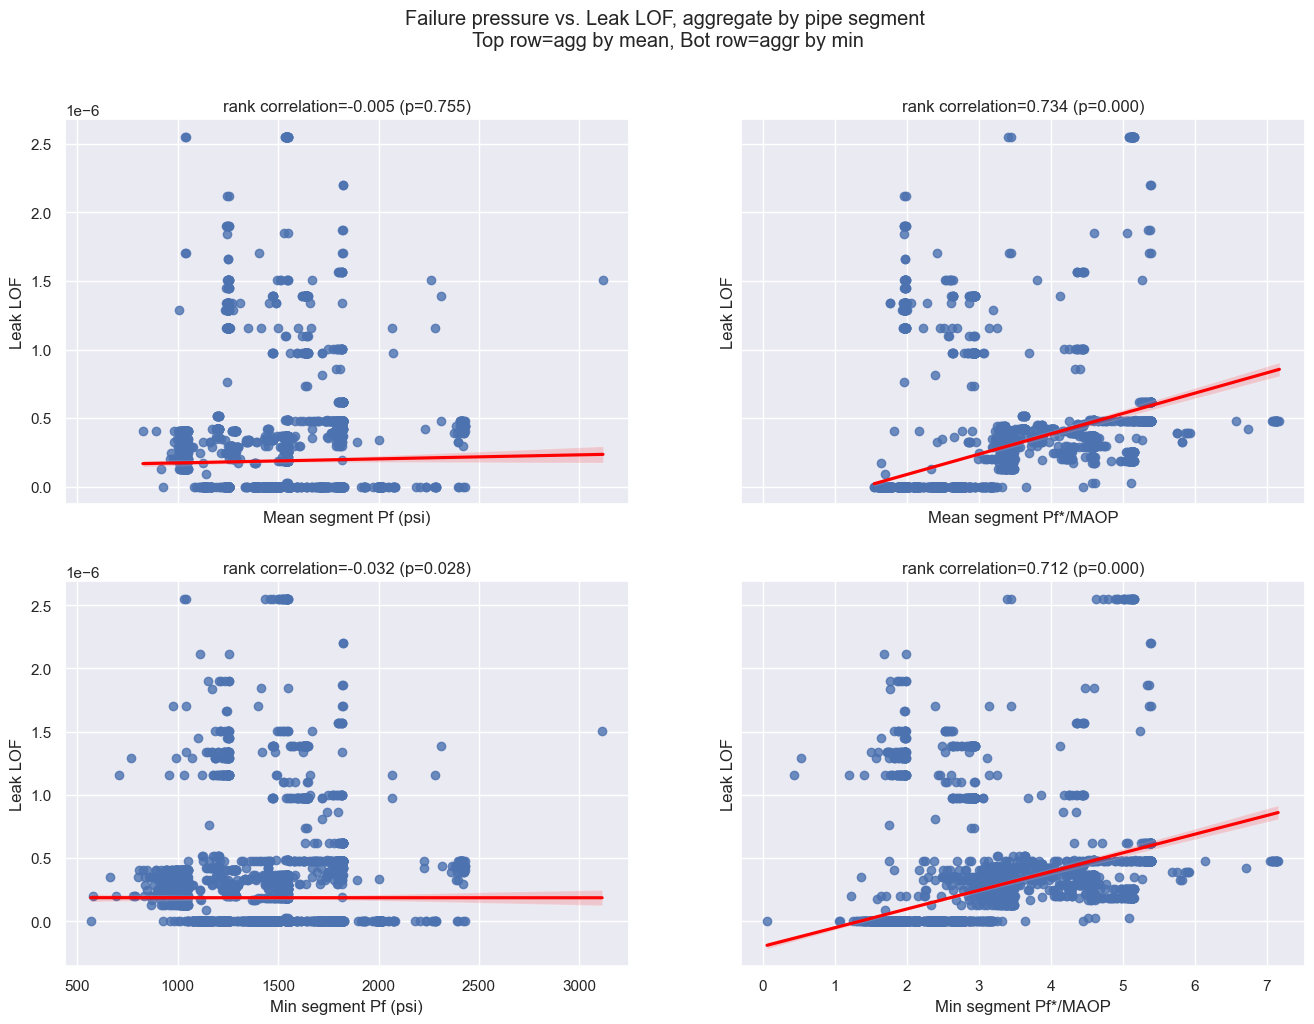

In [67]:
# Leak LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
x_label2 = "Pf*/MAOP"

y_field = "EC_LOF_Leak"
y_label = "Leak LOF"

# plt.figure(figsize=(16, 10))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey="row", sharex="col", figsize=(16, 11))

# Top row = mean aggregation 
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Mean segment {x_label1}",
    y_label=y_label,
    ax=ax1,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field1],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax1.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Mean segment {x_label2}",
    y_label=y_label,
    ax=ax2,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field2],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax2.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

# Bot row = min aggregation
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Min segment {x_label1}",
    y_label=y_label,
    ax=ax3,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field1],
    filtered_performance_df_grouped_by_min[y_field],
)
ax3.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Min segment {x_label2}",
    y_label=y_label,
    ax=ax4,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field2],
    filtered_performance_df_grouped_by_min[y_field],
)
ax4.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")



Text(0.5, 0.98, 'Failure pressure vs. Rupture LOF, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min')

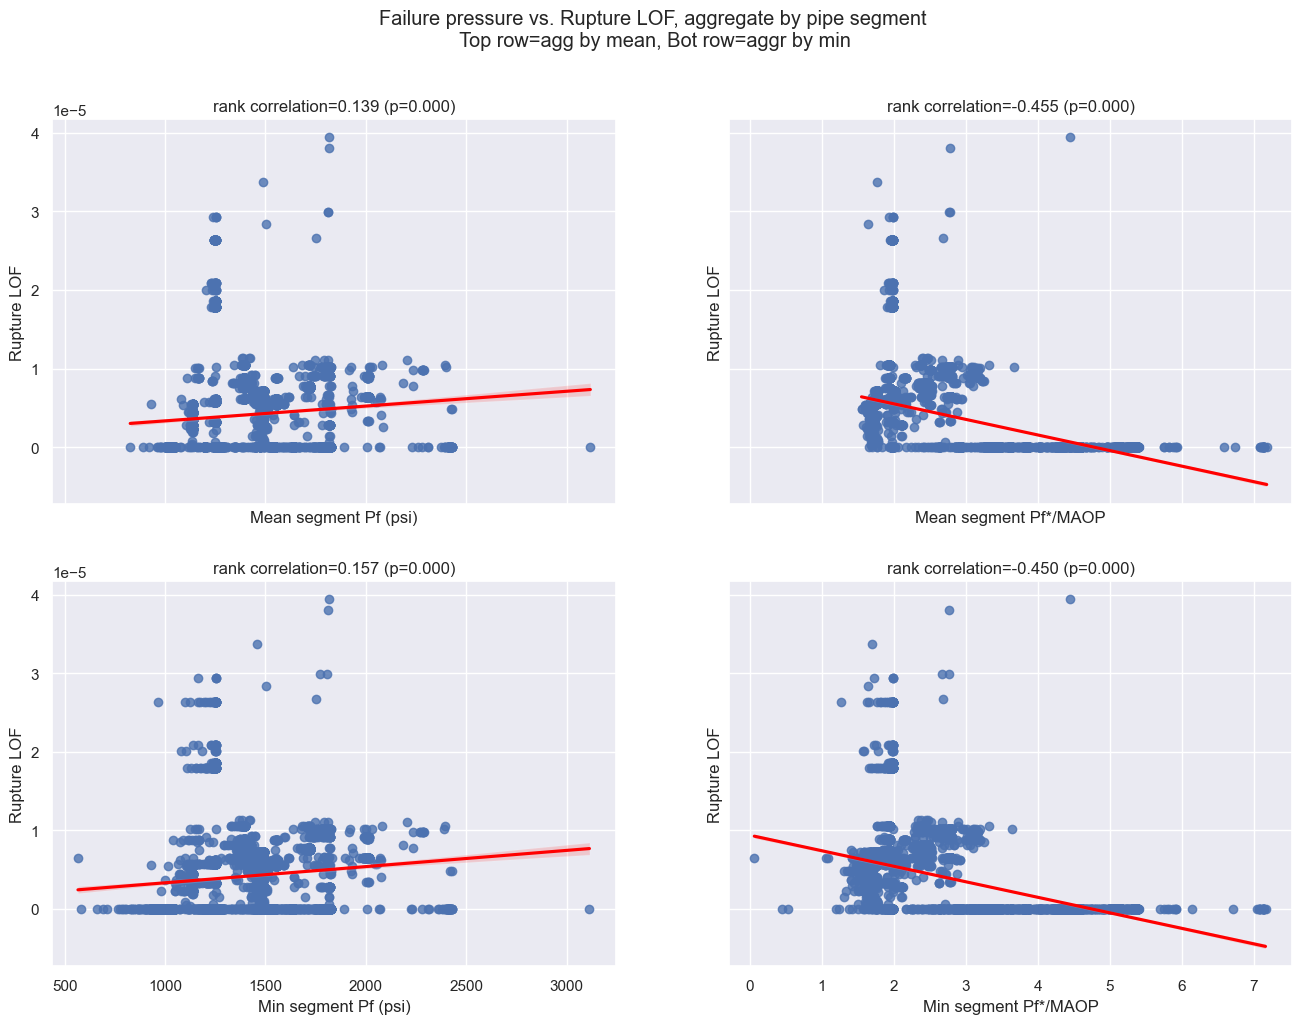

In [63]:
# Rupture LOF:
x_field1 = "Estimated Failure Pressure (Pf)"
x_label1 = "Pf (psi)"
x_field2 = "Pf*/MAOP"
x_label2 = "Pf*/MAOP"

y_field = "EC_LOF_Rupture"
y_label = "Rupture LOF"


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey="row", sharex="col", figsize=(16, 11))

# Top row = mean aggregation 
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Mean segment {x_label1}",
    y_label=y_label,
    ax=ax1,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field1],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax1.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_mean,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Mean segment {x_label2}",
    y_label=y_label,
    ax=ax2,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_mean[x_field2],
    filtered_performance_df_grouped_by_mean[y_field],
)
ax2.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

# Bot row = min aggregation
make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field1,
    y_field=y_field,
    x_label=f"Min segment {x_label1}",
    y_label=y_label,
    ax=ax3,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field1],
    filtered_performance_df_grouped_by_min[y_field],
)
ax3.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")

make_linear_scale_scatter_with_reg_line(
    df=filtered_performance_df_grouped_by_min,
    x_field=x_field2,
    y_field=y_field,
    x_label=f"Min segment {x_label2}",
    y_label=y_label,
    ax=ax4,
)
res = stats.spearmanr(
    filtered_performance_df_grouped_by_min[x_field2],
    filtered_performance_df_grouped_by_min[y_field],
)
ax4.set_title(f"rank correlation={res.statistic:.3f} (p={res.pvalue:.3f})")
plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

plt.suptitle(f"Failure pressure vs. {y_label}, aggregate by pipe segment\n Top row=agg by mean, Bot row=aggr by min")

After aggregating over pipe segment, it looks like the Rupture LOF's correlation with failure pressure is closer to our expectations. However, for segments with a given failure pressure, the LOF can have a big range, suggesting high variance in risk prediction (not precise).

### ~~Look at this relationship against normalized volumetric loss~~

Not necessary because the failure pressure calculated from RSTRENG model are derived from corrosion dimensions